## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.055812 -0.026036 -0.158892  0.772813 -0.009035  0.959863
1  0.368251 -1.273754  0.235294 -0.711072  0.316239 -1.250706
2  0.351719 -0.559919 -0.967303 -0.260721  1.201047  0.313469
3  1.627348  0.083467 -0.835476 -1.340553  0.414073  0.338383
4  0.299802  0.177045 -0.270291 -0.300482 -0.737366 -0.040262


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9962349	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9840443	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9743232	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9621815	total: 58.8ms	remaining: 14.7s
4:	learn: 0.9534604	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9426959	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9319860	total: 60.2ms	remaining: 8.54s
7:	learn: 0.9226578	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9123617	total: 61.3ms	remaining: 6.75s
9:	learn: 0.9040262	total: 61.9ms	remaining: 6.12s
10:	learn: 0.8965664	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8864079	total: 63ms	remaining: 5.18s
12:	learn: 0.8765373	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8689918	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8618747	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8550931	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8463813	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8379753	total: 66ms	remaining: 3.6s
18:	learn: 0.8307176	total: 66.5ms	remaining: 3.44

108:	learn: 0.3900694	total: 109ms	remaining: 891ms
109:	learn: 0.3869718	total: 110ms	remaining: 887ms
110:	learn: 0.3840205	total: 110ms	remaining: 881ms
111:	learn: 0.3813311	total: 110ms	remaining: 876ms
112:	learn: 0.3783375	total: 111ms	remaining: 871ms
113:	learn: 0.3756332	total: 111ms	remaining: 866ms
114:	learn: 0.3724716	total: 112ms	remaining: 861ms
115:	learn: 0.3693122	total: 112ms	remaining: 857ms
116:	learn: 0.3666995	total: 113ms	remaining: 852ms
117:	learn: 0.3645586	total: 113ms	remaining: 847ms
118:	learn: 0.3625479	total: 114ms	remaining: 841ms
119:	learn: 0.3603301	total: 114ms	remaining: 836ms
120:	learn: 0.3580419	total: 114ms	remaining: 832ms
121:	learn: 0.3555265	total: 115ms	remaining: 827ms
122:	learn: 0.3528508	total: 115ms	remaining: 823ms
123:	learn: 0.3496039	total: 116ms	remaining: 820ms
124:	learn: 0.3470648	total: 117ms	remaining: 817ms
125:	learn: 0.3441342	total: 117ms	remaining: 814ms
126:	learn: 0.3410881	total: 118ms	remaining: 810ms
127:	learn: 

264:	learn: 0.1281256	total: 187ms	remaining: 518ms
265:	learn: 0.1277952	total: 187ms	remaining: 517ms
266:	learn: 0.1268331	total: 188ms	remaining: 515ms
267:	learn: 0.1265832	total: 188ms	remaining: 514ms
268:	learn: 0.1257603	total: 188ms	remaining: 512ms
269:	learn: 0.1255367	total: 189ms	remaining: 511ms
270:	learn: 0.1247635	total: 189ms	remaining: 509ms
271:	learn: 0.1245348	total: 190ms	remaining: 508ms
272:	learn: 0.1237091	total: 190ms	remaining: 506ms
273:	learn: 0.1227504	total: 196ms	remaining: 518ms
274:	learn: 0.1218366	total: 196ms	remaining: 517ms
275:	learn: 0.1209566	total: 197ms	remaining: 516ms
276:	learn: 0.1202874	total: 197ms	remaining: 514ms
277:	learn: 0.1194178	total: 197ms	remaining: 512ms
278:	learn: 0.1191845	total: 198ms	remaining: 511ms
279:	learn: 0.1184758	total: 198ms	remaining: 510ms
280:	learn: 0.1182469	total: 199ms	remaining: 509ms
281:	learn: 0.1175469	total: 199ms	remaining: 508ms
282:	learn: 0.1173578	total: 200ms	remaining: 507ms
283:	learn: 

488:	learn: 0.0439715	total: 292ms	remaining: 305ms
489:	learn: 0.0437052	total: 292ms	remaining: 304ms
490:	learn: 0.0434648	total: 293ms	remaining: 303ms
491:	learn: 0.0432004	total: 293ms	remaining: 303ms
492:	learn: 0.0429780	total: 294ms	remaining: 302ms
493:	learn: 0.0427734	total: 294ms	remaining: 302ms
494:	learn: 0.0426846	total: 295ms	remaining: 301ms
495:	learn: 0.0425060	total: 295ms	remaining: 300ms
496:	learn: 0.0422790	total: 296ms	remaining: 299ms
497:	learn: 0.0421932	total: 296ms	remaining: 298ms
498:	learn: 0.0420194	total: 297ms	remaining: 298ms
499:	learn: 0.0418197	total: 297ms	remaining: 297ms
500:	learn: 0.0417365	total: 297ms	remaining: 296ms
501:	learn: 0.0416549	total: 298ms	remaining: 296ms
502:	learn: 0.0414251	total: 298ms	remaining: 295ms
503:	learn: 0.0411957	total: 299ms	remaining: 294ms
504:	learn: 0.0411166	total: 300ms	remaining: 294ms
505:	learn: 0.0410643	total: 300ms	remaining: 293ms
506:	learn: 0.0408758	total: 301ms	remaining: 293ms
507:	learn: 

644:	learn: 0.0237600	total: 370ms	remaining: 204ms
645:	learn: 0.0236718	total: 371ms	remaining: 203ms
646:	learn: 0.0236125	total: 371ms	remaining: 202ms
647:	learn: 0.0235005	total: 371ms	remaining: 202ms
648:	learn: 0.0234480	total: 372ms	remaining: 201ms
649:	learn: 0.0233238	total: 372ms	remaining: 201ms
650:	learn: 0.0232380	total: 373ms	remaining: 200ms
651:	learn: 0.0231864	total: 373ms	remaining: 199ms
652:	learn: 0.0231021	total: 381ms	remaining: 202ms
653:	learn: 0.0230758	total: 381ms	remaining: 202ms
654:	learn: 0.0229927	total: 382ms	remaining: 201ms
655:	learn: 0.0229099	total: 382ms	remaining: 200ms
656:	learn: 0.0228842	total: 383ms	remaining: 200ms
657:	learn: 0.0227961	total: 383ms	remaining: 199ms
658:	learn: 0.0227152	total: 384ms	remaining: 198ms
659:	learn: 0.0226901	total: 384ms	remaining: 198ms
660:	learn: 0.0226165	total: 384ms	remaining: 197ms
661:	learn: 0.0225220	total: 385ms	remaining: 196ms
662:	learn: 0.0224972	total: 385ms	remaining: 196ms
663:	learn: 

837:	learn: 0.0128401	total: 476ms	remaining: 92ms
838:	learn: 0.0128259	total: 477ms	remaining: 91.4ms
839:	learn: 0.0127774	total: 477ms	remaining: 90.8ms
840:	learn: 0.0127634	total: 477ms	remaining: 90.2ms
841:	learn: 0.0127520	total: 478ms	remaining: 89.6ms
842:	learn: 0.0127094	total: 478ms	remaining: 89.1ms
843:	learn: 0.0126440	total: 479ms	remaining: 88.5ms
844:	learn: 0.0126270	total: 479ms	remaining: 87.9ms
845:	learn: 0.0125854	total: 479ms	remaining: 87.3ms
846:	learn: 0.0125688	total: 480ms	remaining: 86.7ms
847:	learn: 0.0125091	total: 480ms	remaining: 86.1ms
848:	learn: 0.0124534	total: 481ms	remaining: 85.5ms
849:	learn: 0.0124400	total: 481ms	remaining: 84.9ms
850:	learn: 0.0123997	total: 481ms	remaining: 84.3ms
851:	learn: 0.0123834	total: 482ms	remaining: 83.7ms
852:	learn: 0.0123725	total: 482ms	remaining: 83.1ms
853:	learn: 0.0123282	total: 483ms	remaining: 82.5ms
854:	learn: 0.0122888	total: 483ms	remaining: 81.9ms
855:	learn: 0.0122346	total: 484ms	remaining: 81

985:	learn: 0.0091225	total: 554ms	remaining: 7.87ms
986:	learn: 0.0090963	total: 555ms	remaining: 7.31ms
987:	learn: 0.0090826	total: 555ms	remaining: 6.75ms
988:	learn: 0.0090713	total: 556ms	remaining: 6.18ms
989:	learn: 0.0090578	total: 556ms	remaining: 5.62ms
990:	learn: 0.0090321	total: 557ms	remaining: 5.05ms
991:	learn: 0.0090237	total: 561ms	remaining: 4.52ms
992:	learn: 0.0089955	total: 561ms	remaining: 3.96ms
993:	learn: 0.0089875	total: 562ms	remaining: 3.39ms
994:	learn: 0.0089552	total: 562ms	remaining: 2.83ms
995:	learn: 0.0089160	total: 563ms	remaining: 2.26ms
996:	learn: 0.0088731	total: 563ms	remaining: 1.69ms
997:	learn: 0.0088431	total: 564ms	remaining: 1.13ms
998:	learn: 0.0088157	total: 564ms	remaining: 564us
999:	learn: 0.0087933	total: 564ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

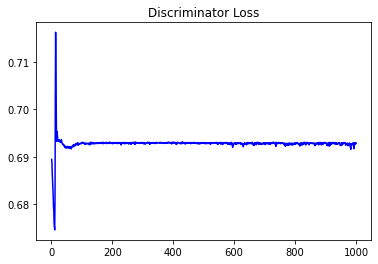

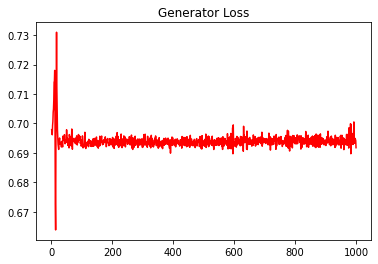

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1064792821849437


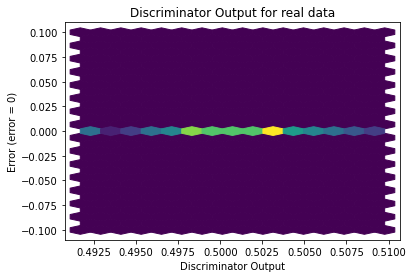

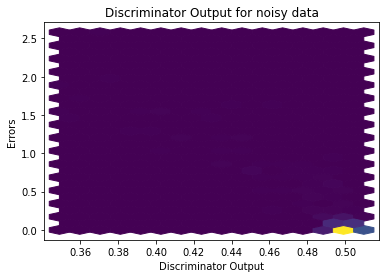

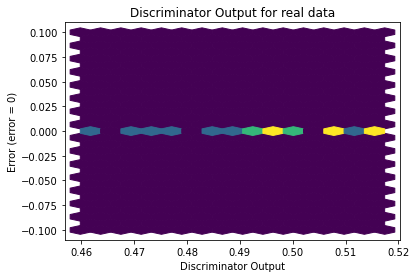

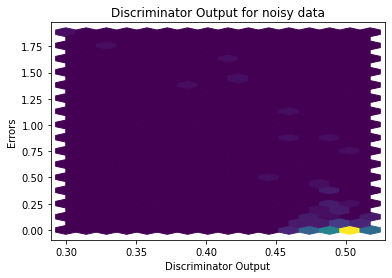

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


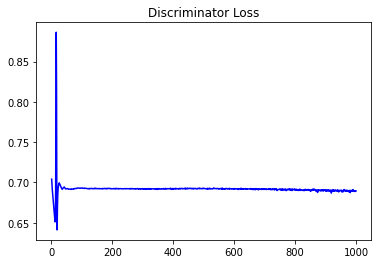

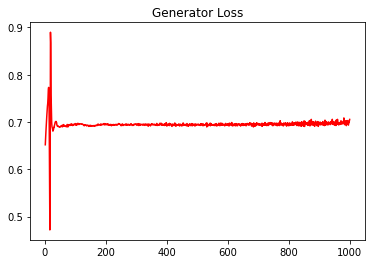

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16636691540829762


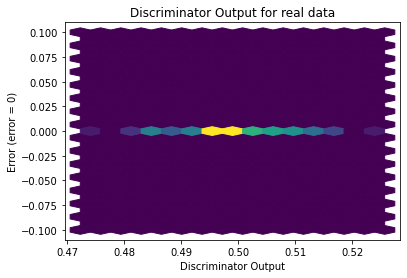

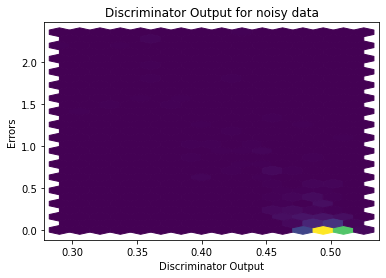

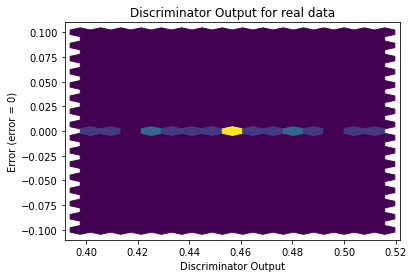

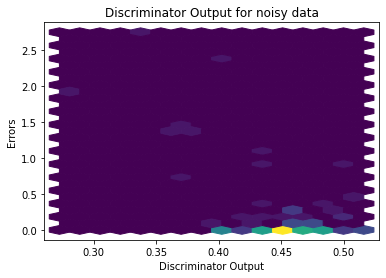

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0839]], requires_grad=True)
